In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat

# Spanish dataset

In [2]:
spain_power_data = np.genfromtxt('spain_energy_market.csv', delimiter=',', dtype=None, encoding=None)
data = spain_power_data[...,5] # select column with values
data = data[spain_power_data[...,2] == 'Demanda real'] # select energy demand values
data = data.astype(float) # convert into floats

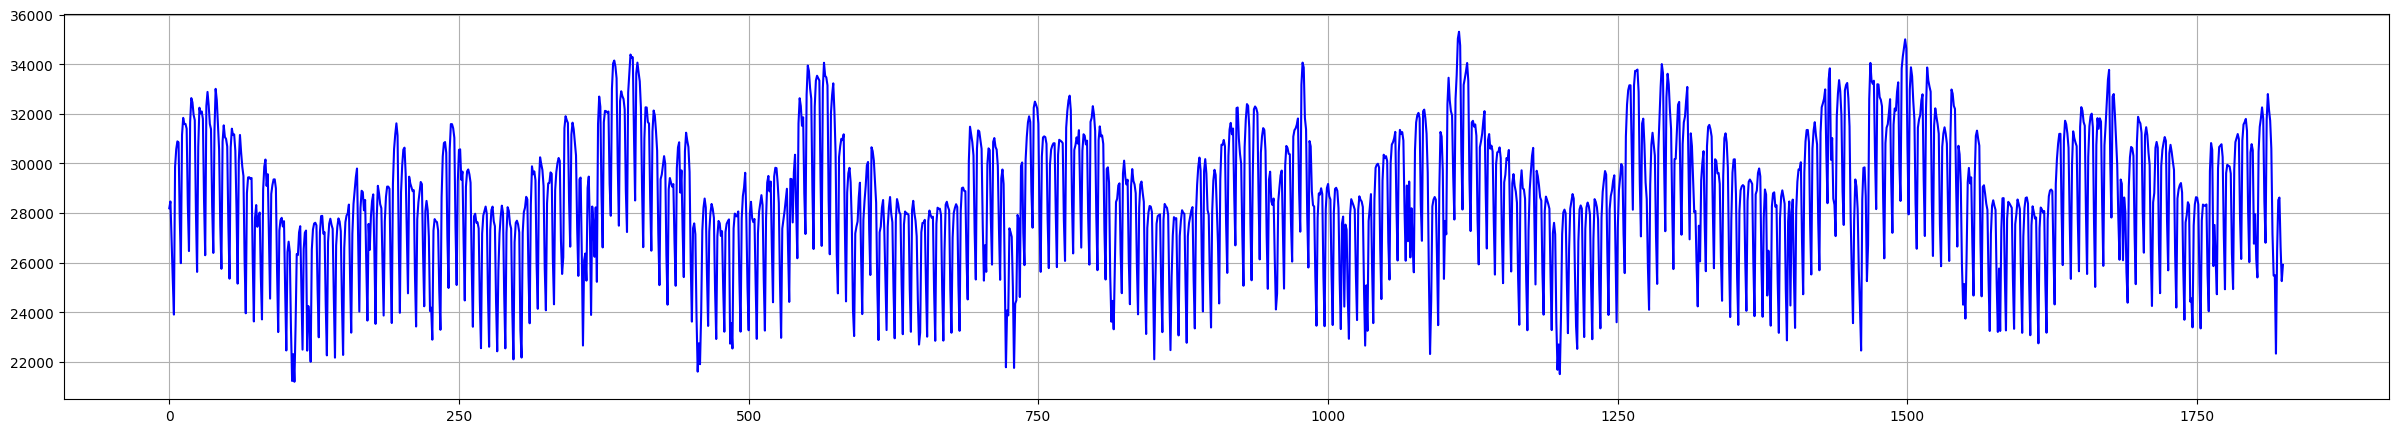

In [3]:
fig = plt.figure(figsize=(30,5))
plt.plot(data, label='time series', color='b')
plt.grid()

## Autocorrelation

(0.0, 20.0)

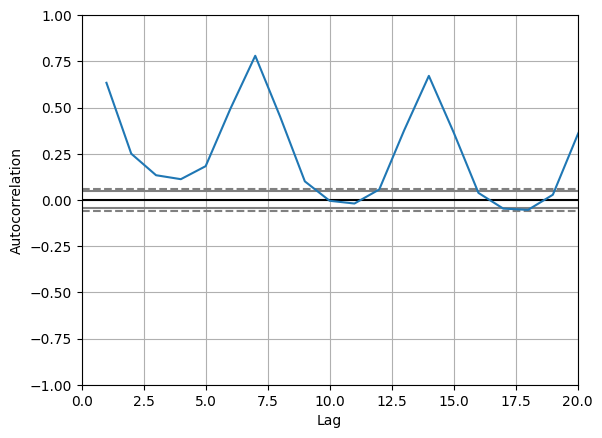

In [4]:
s = pd.Series(data, copy=True)
ax = pd.plotting.autocorrelation_plot(s)
ax.set_xlim([0, 20])

## Remove seasonality

(0.0, 100.0)

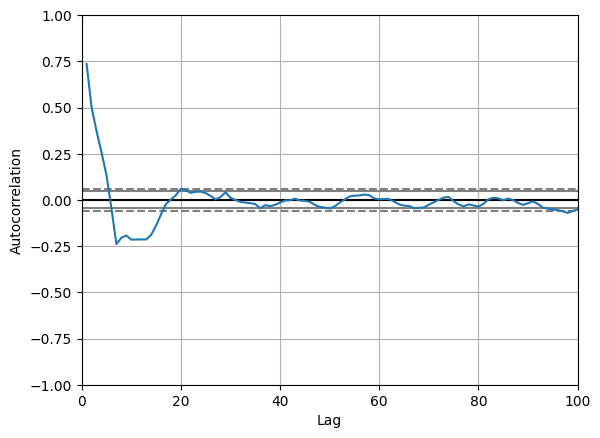

In [5]:
s7 = s.diff(periods=7)[7:]
ax = pd.plotting.autocorrelation_plot(s7)
ax.set_xlim([0, 100])

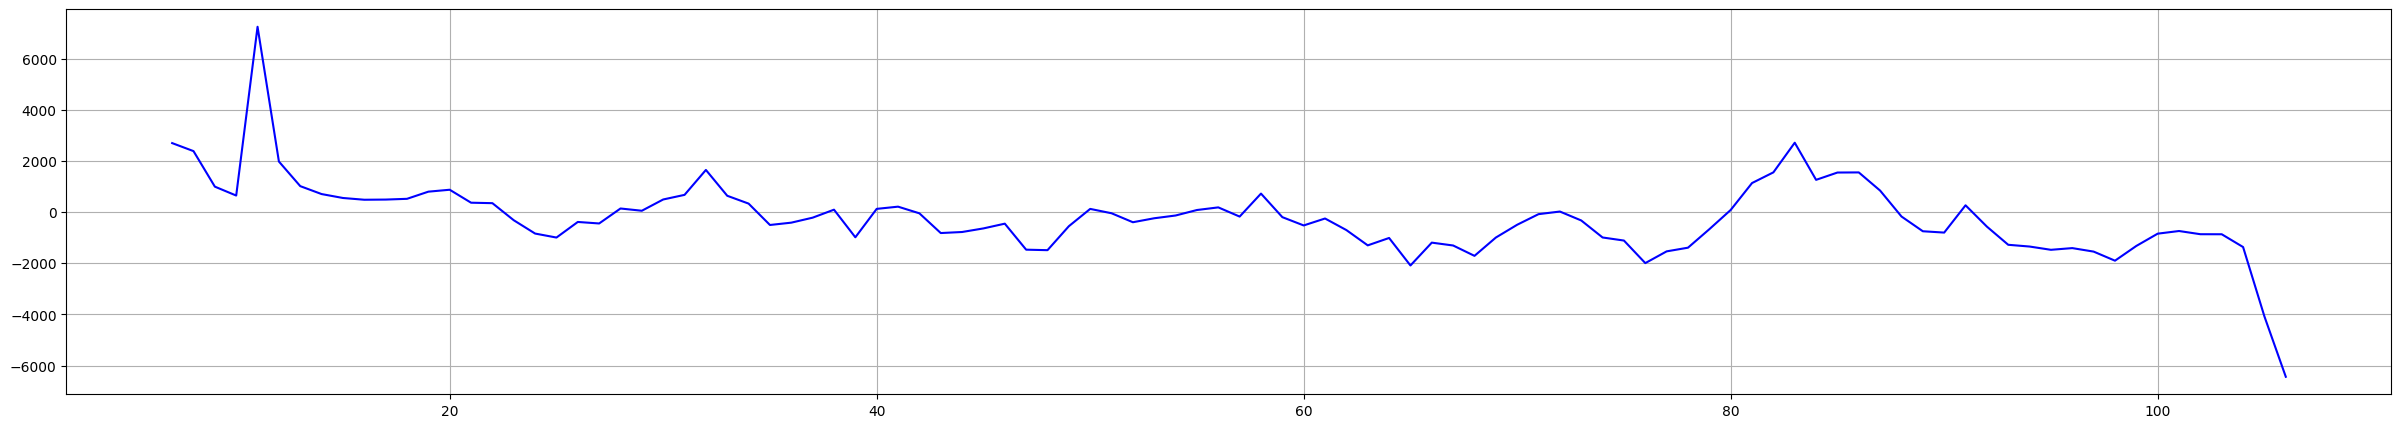

In [6]:
fig = plt.figure(figsize=(30,5))
plt.plot(s7[:100], label='time series', color='b')
plt.grid()

(0.0, 500.0)

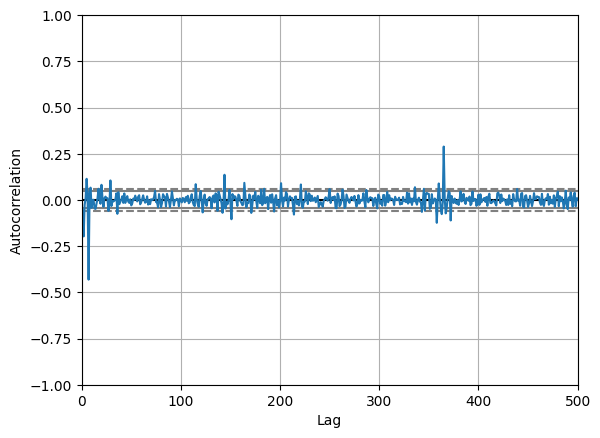

In [7]:
s1 = s7.diff(periods=1)[1:]
ax = pd.plotting.autocorrelation_plot(s1)
ax.set_xlim([0, 500])

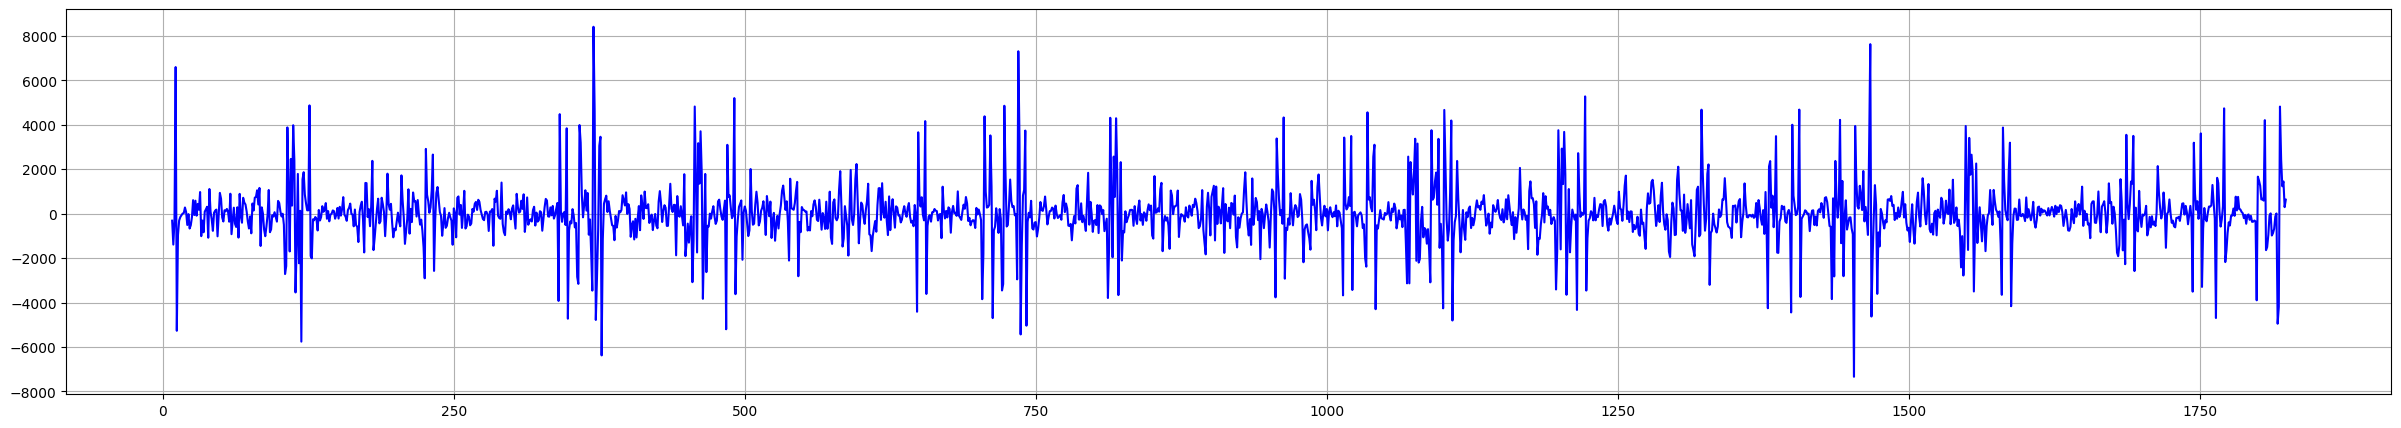

In [8]:
fig = plt.figure(figsize=(30,5))
plt.plot(s1, label='time series', color='b')
plt.grid()

In [24]:
d1 = (s[1:]-s1)[7:]
d7 = s1[7:]-s7
r = s7 + d7 + d1

In [26]:
(s[8:]==r).all()

True

# ACEA

In [11]:
mat = loadmat('TS_Acea.mat')  # load mat-file
ACEA_data = mat['X'] # original resolution (1 = 10 mins)
ACEA_data = ACEA_data[::6] # hourly forecast

# remove 11 weeks anomaly in the dataset
data = np.concatenate((ACEA_data[:16000], ACEA_data[16000+168*11:]))

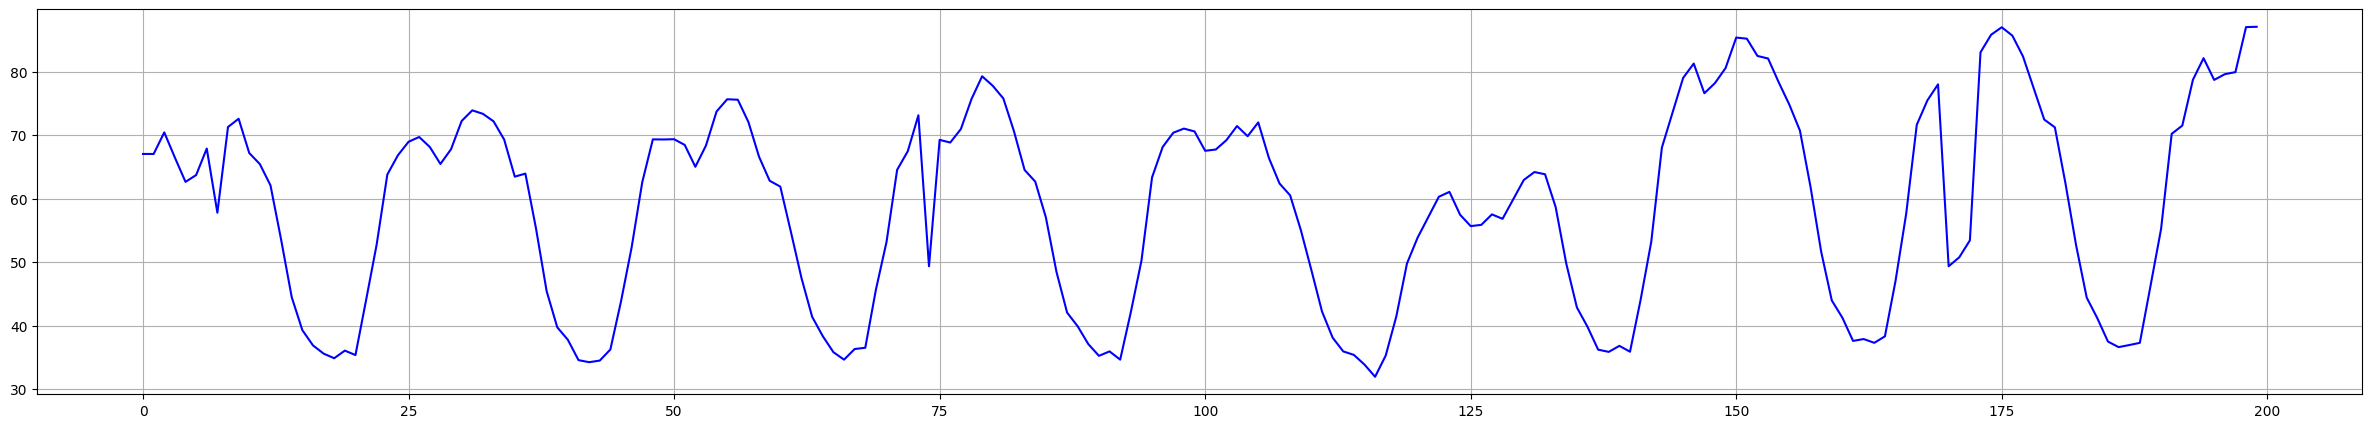

In [12]:
fig = plt.figure(figsize=(30,5))
plt.plot(data[500:700], label='time series', color='b')
plt.grid()

In [12]:
L= 7*24
data = data[:-(data.shape[0]%L)]

n_data,_ = data.shape

n_te = np.ceil(0.41*n_data).astype(int)
n_val = np.ceil(0.41*n_data).astype(int)
n_tr = n_data - n_te - n_val

In [13]:
Xtr = data[:n_tr, :]
trend = Xtr[:-(n_tr%L),:]

In [14]:
trend2 = trend.reshape(-1, L).mean(axis=0)

In [22]:
test = np.array([1,2,3,4,5,6,7,8])
resh = test.reshape(-11,2)
avg = resh.mean(axis=0)
print(resh)
print(avg)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[4. 5.]


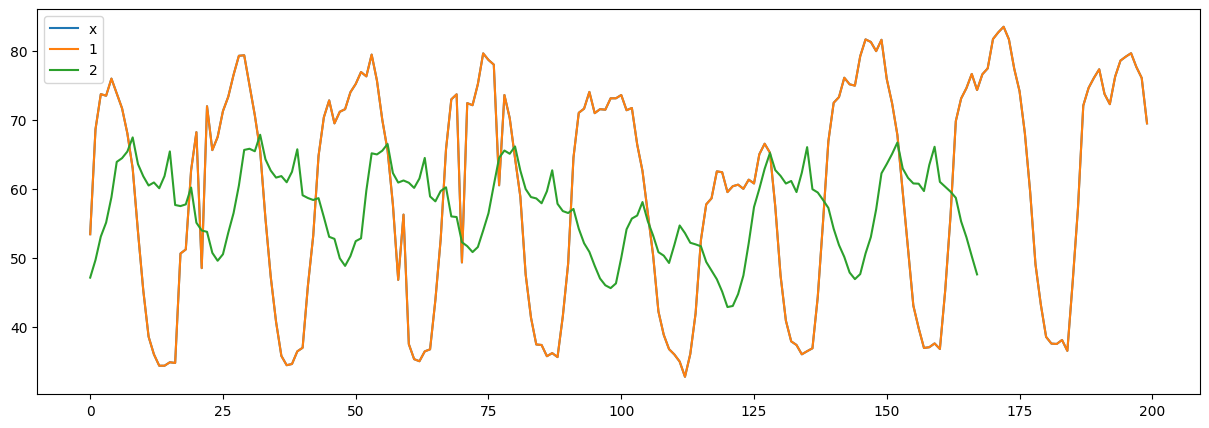

In [15]:
fig = plt.figure(figsize=(15,5))
plt.plot(Xtr[:200], label="x")
plt.plot(trend[:200], label="1")
plt.plot(trend2, label="2")
plt.legend(loc='best', fontsize=10)

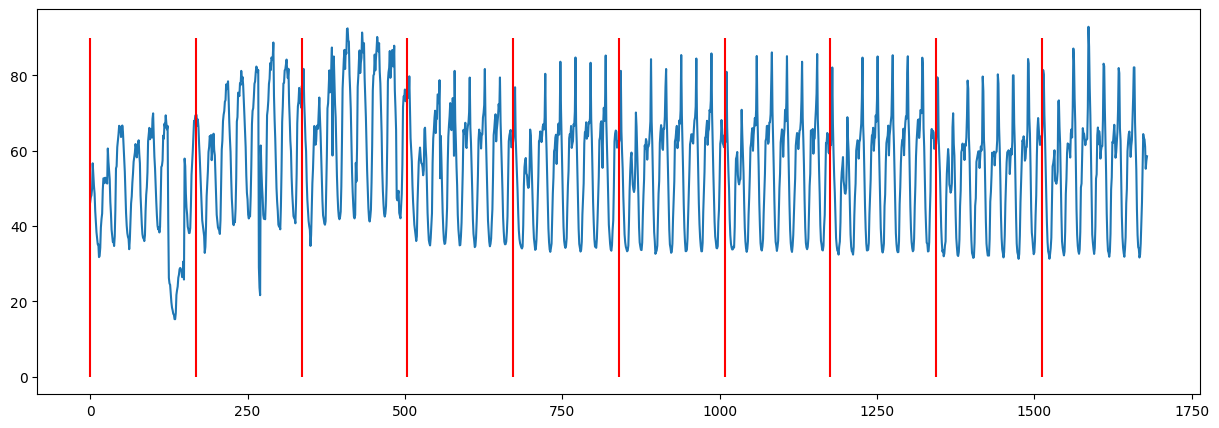

In [19]:
fig = plt.figure(figsize=(15,5))
plt.plot(Xtr[2100:3780], label="x")
plt.vlines([168*n for n in range(10)], ymin=0, ymax=90, colors="r")

In [41]:
from scipy.signal import argrelextrema

# for local maxima
max = argrelextrema(Xtr[2100:3780], np.greater, order = 12)

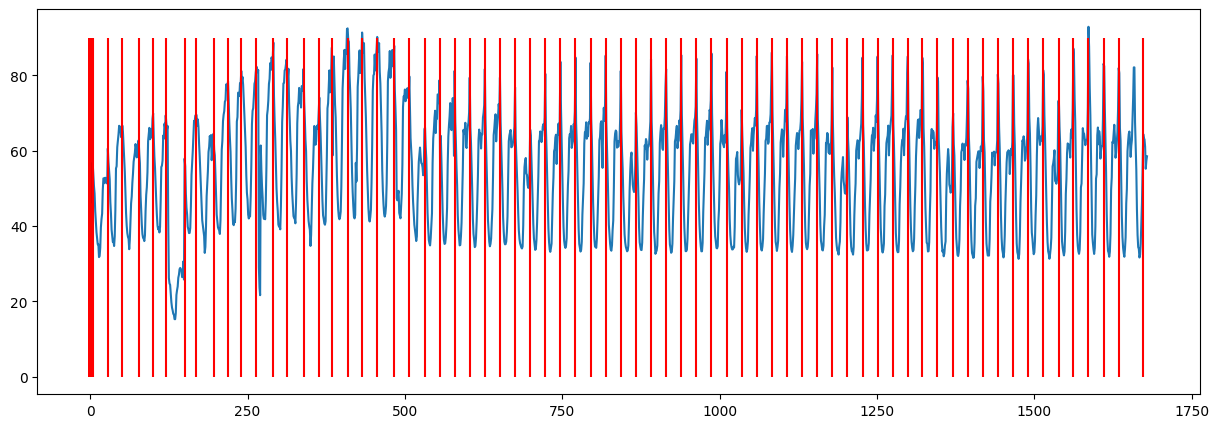

In [26]:
fig = plt.figure(figsize=(15,5))
plt.plot(Xtr[2100:3780], label="x")
plt.vlines(max, ymin=0, ymax=90, colors="r")

In [43]:
max.shape

(70,)

In [46]:
max = argrelextrema(data, np.greater, order = 12)
max = np.array(max)[0]

In [47]:
a = max[0:-1]
b = max[1:]

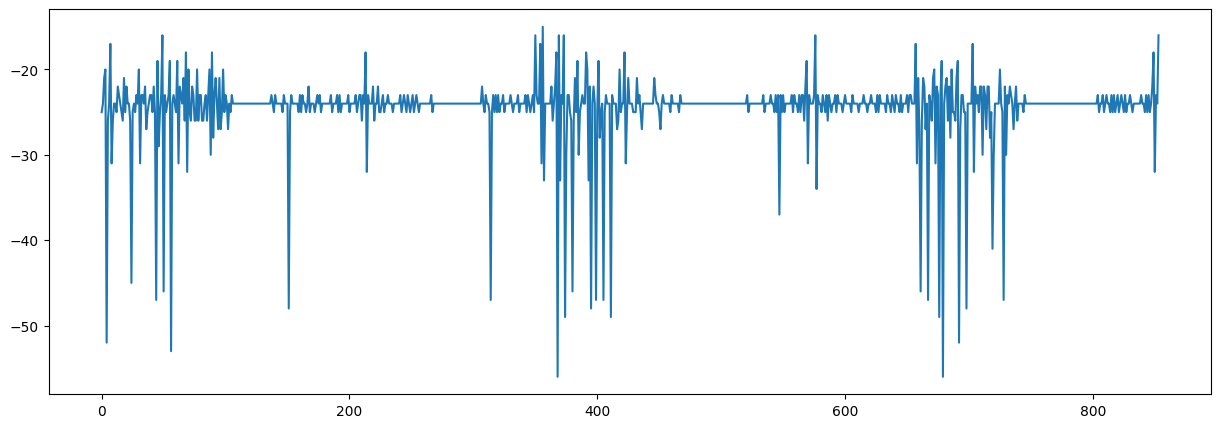

In [48]:
fig = plt.figure(figsize=(15,5))
plt.plot((a-b))

In [49]:
c = b-a

In [22]:
trend = np.repeat(trend[np.newaxis,...], n_data/L, axis=0).reshape(-1,1)

In [7]:
new_data = data - trend

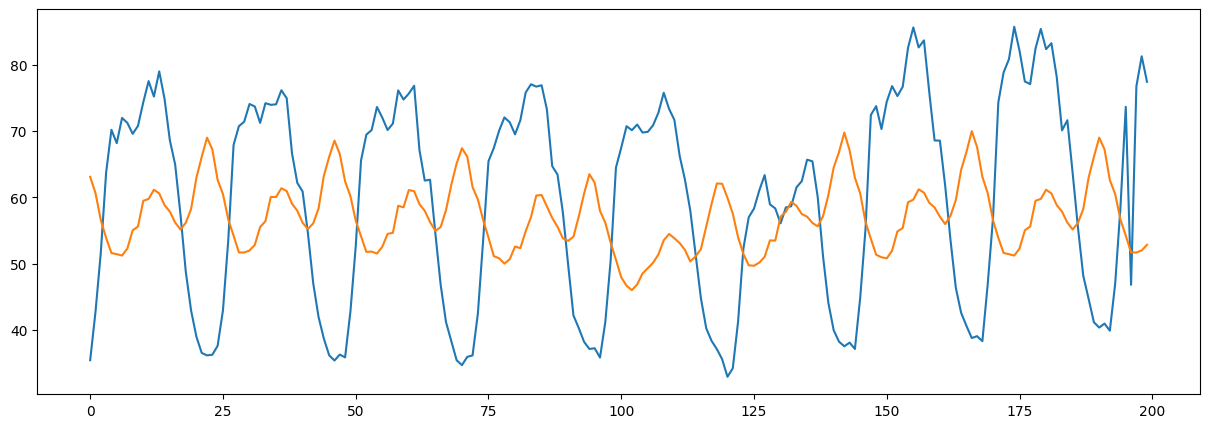

In [24]:
fig = plt.figure(figsize=(15,5))
# plt.plot(new_data[200:400])
plt.plot(data[1000:1200])
plt.plot(trend[1000:1200])

In [26]:

new_data = data[:-48]
new_data = new_data.reshape(-1, 7*24).mean(axis=0)
new_data_r = np.repeat(new_data[None,...], 125, axis=0).reshape(-1)
plt.plot(new_data_r)

ValueError: cannot reshape array of size 20952 into shape (168)

(0.0, 100.0)

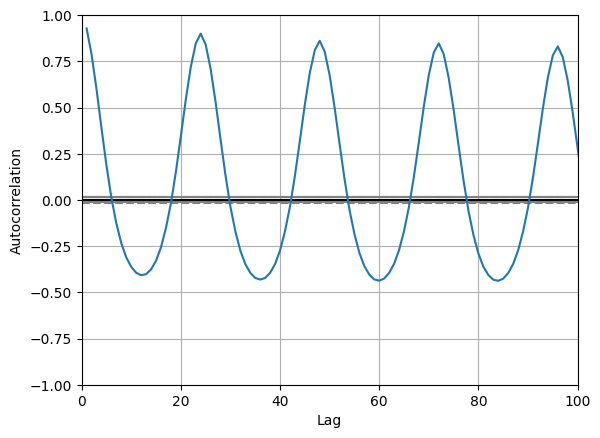

In [10]:
s = pd.Series(data.squeeze(), copy=True)
ax = pd.plotting.autocorrelation_plot(s)
ax.set_xlim([0, 100])

(0.0, 200.0)

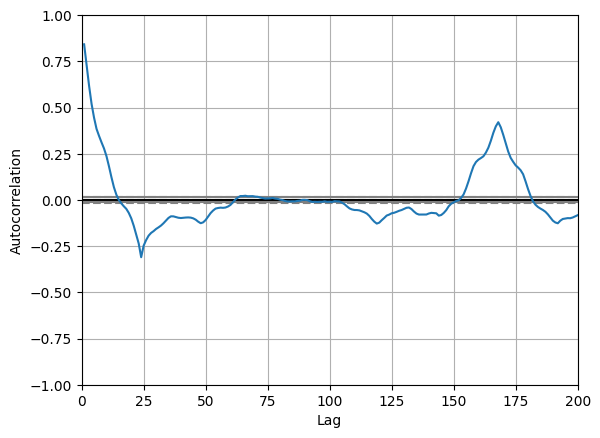

In [16]:
s24 = s.diff(periods=24)[24:]
ax = pd.plotting.autocorrelation_plot(s24)
ax.set_xlim([0, 200])

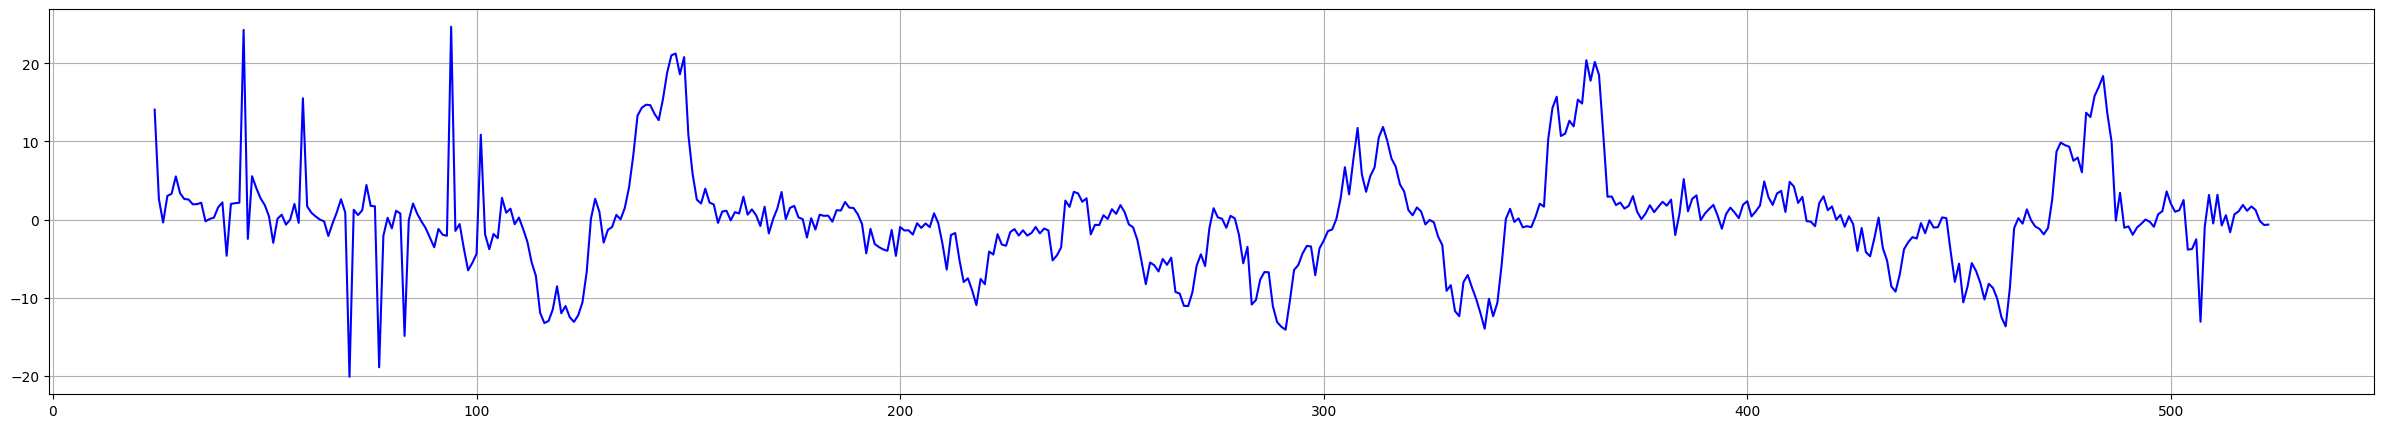

In [20]:
fig = plt.figure(figsize=(30,5))
plt.plot(s24[:500], label='time series', color='b')
plt.grid()